In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
from scripts.eda import EDA

input_path = '../data/raw/data.csv'

eda = EDA(input_path)

In [3]:
data = eda.load_data()
eda.data_overview()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 

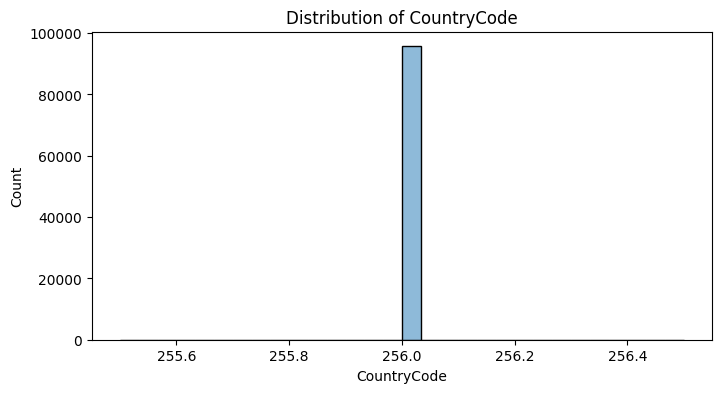

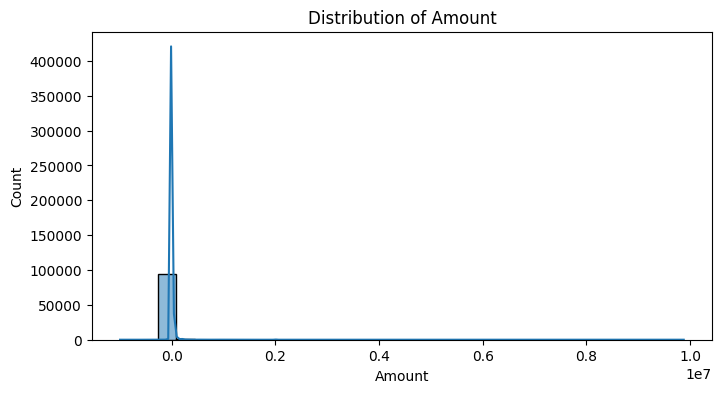

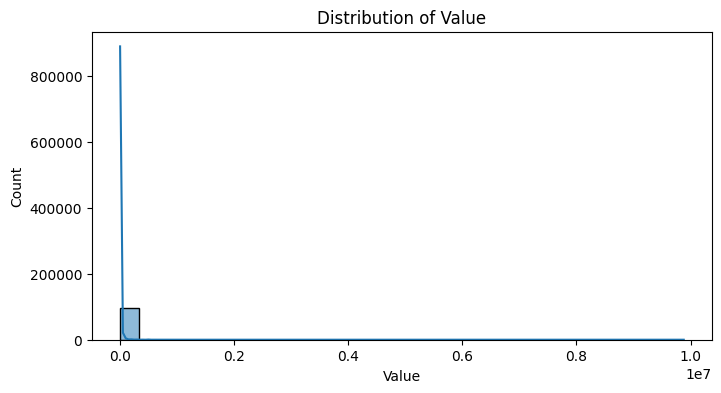

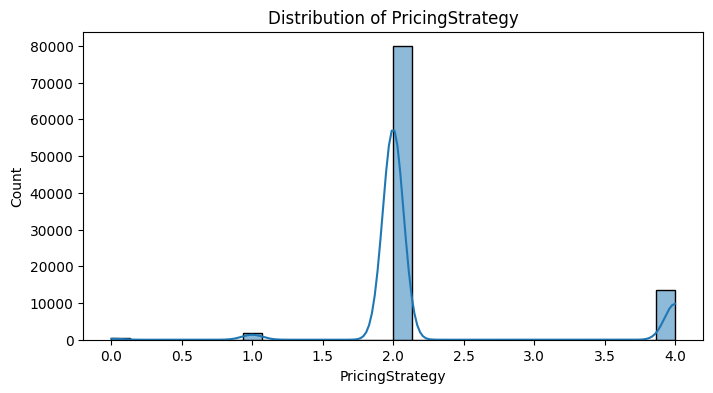

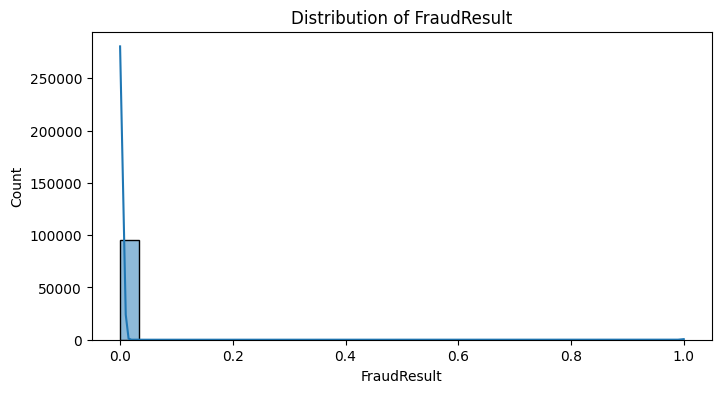

In [4]:
eda.visualize_numerical_distribution()

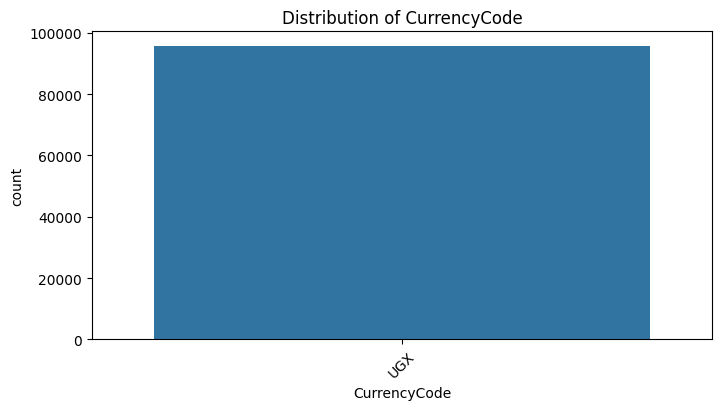

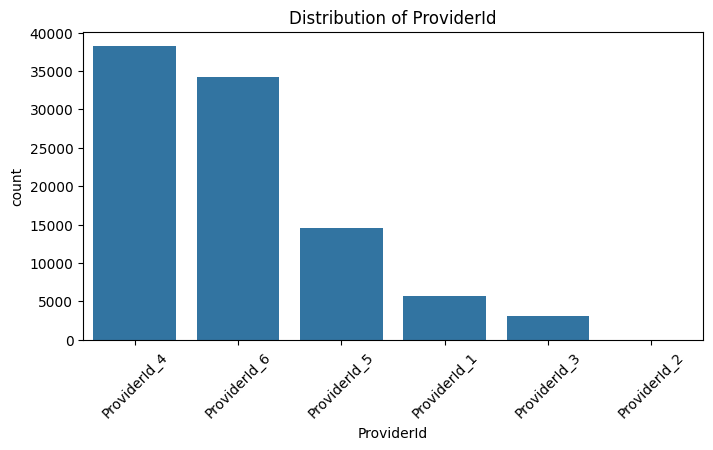

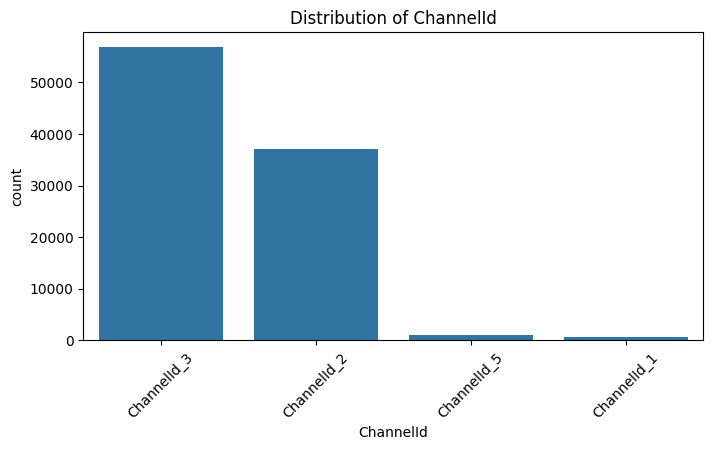

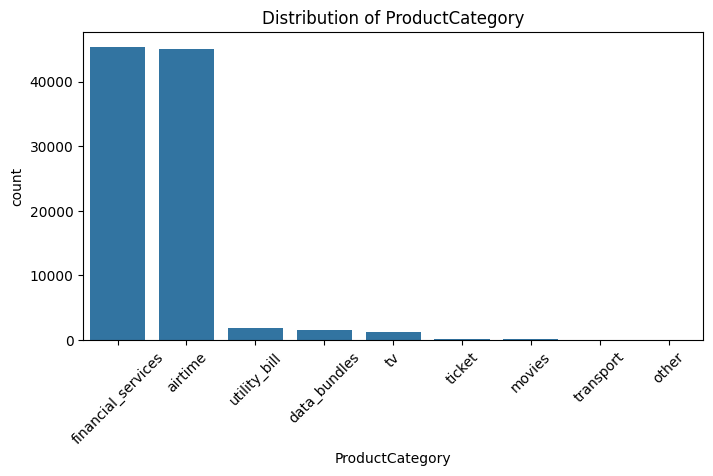

In [5]:

eda.visualize_categorical_distribution()

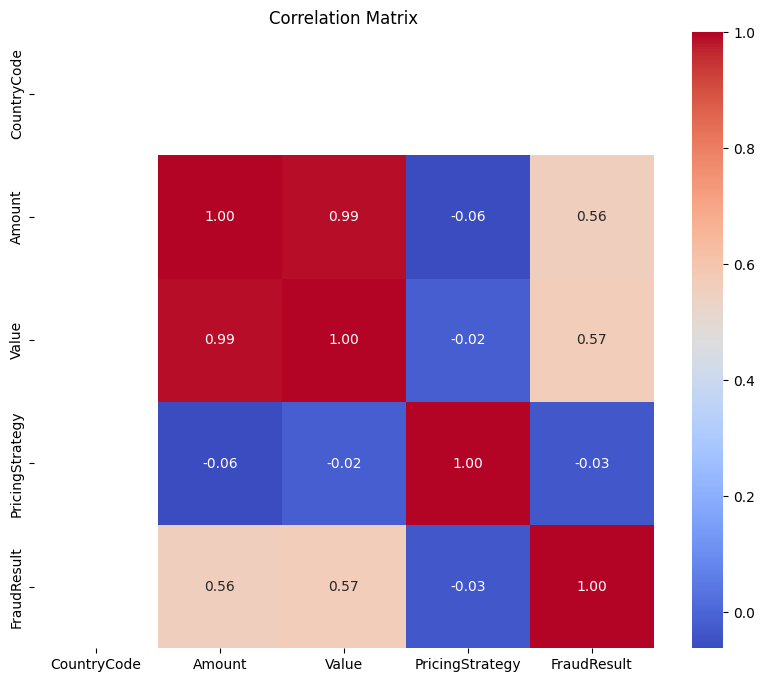

In [6]:
eda.correlation_analysis()

In [7]:
eda.identify_missing_values()


Missing Values Summary:
                       Missing Values  % Missing
TransactionId                      0        0.0
BatchId                            0        0.0
AccountId                          0        0.0
SubscriptionId                     0        0.0
CustomerId                         0        0.0
CurrencyCode                       0        0.0
CountryCode                        0        0.0
ProviderId                         0        0.0
ProductId                          0        0.0
ProductCategory                    0        0.0
ChannelId                          0        0.0
Amount                             0        0.0
Value                              0        0.0
TransactionStartTime               0        0.0
PricingStrategy                    0        0.0
FraudResult                        0        0.0


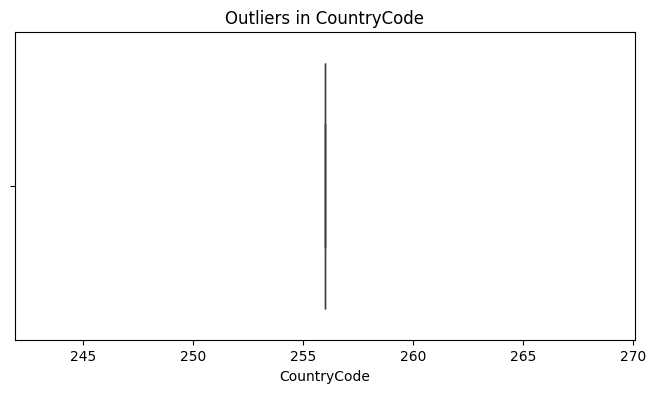

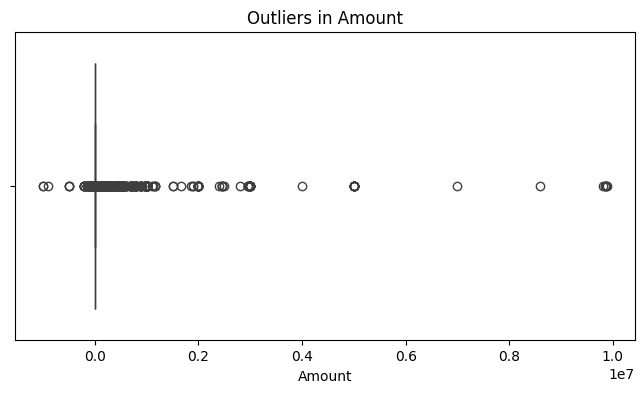

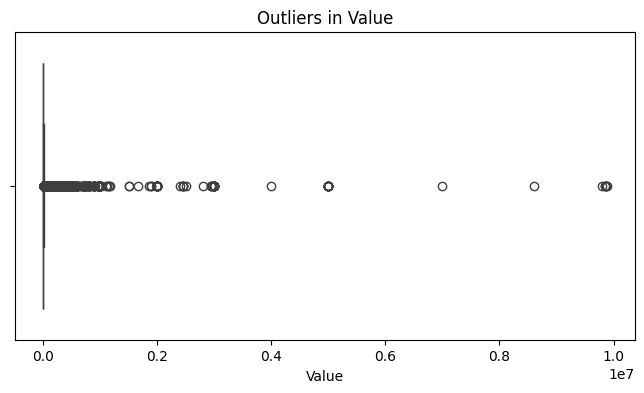

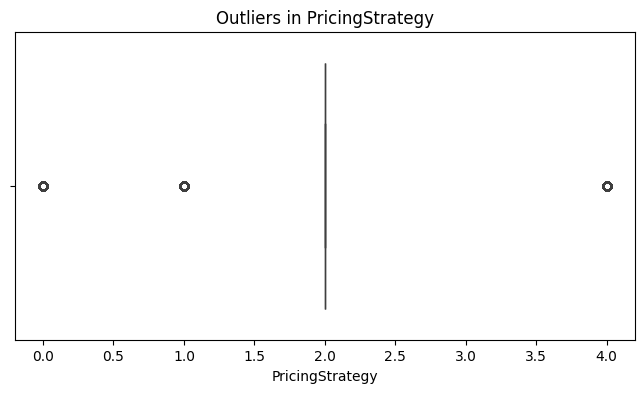

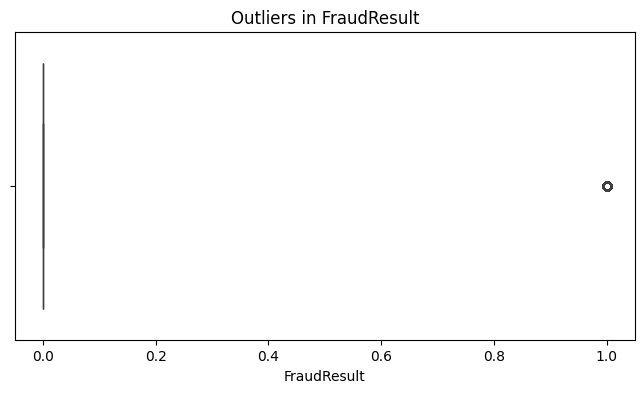

In [8]:
eda.detect_outliers()